In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [35]:
final_df = pd.DataFrame()
for page_no in range(1,160):

    url = 'https://internshala.com/internships/page-{}/'.format(page_no)
    
    webpage = requests.get(url).text   
    soup = BeautifulSoup(webpage)
    offers = soup.find_all('div',class_ = "container-fluid individual_internship visibilityTrackerItem")    
    
    jobs = []
    companies = []
    location = []
    start_date = []
    duration = []
    stipend = []
    extra_content = []
    skills_required = []
    posted = []

    for i in offers:
        jobs.append(i.find('h3').text.strip())
        companies.append(i.find('h4').text.strip())
        location.append(i.find_all('span')[1].text.strip())
        start_date.append(i.find_all('span')[3].text.strip())
        duration.append(i.find_all('div',class_ = "item_body")[1].text.strip())
        stipend.append(i.find_all('div',class_ = "item_body")[2].text.strip())
        no_of_belowed_content = len(i.find_all('div',class_ = "status status-small status-inactive"))
        temp = []
        for j in range (no_of_belowed_content):
            temp.append(i.find_all('div',class_ = "status status-small status-inactive")[j].text.strip())
        extra_content.append(temp)

        close_post_or_not = len(i.find_all('div',class_ = 'status status-small status-success'))
        if close_post_or_not>=1:
            posted.append(i.find_all('div',class_ = 'status status-small status-success')[0].text.strip())
        else:
            posted.append("NULL")

        #details
        href_link = i.find_all('div',class_ = "button_container_card")[0].find('a')['href']
        details = requests.get('https://internshala.com/'+href_link).text
        soup2 = BeautifulSoup(details)
        len_of_skills_list = len(soup2.find_all('div',class_ ="section_heading heading_5_5 skills_heading"))
        temp2 = []
        if (len_of_skills_list>=1):
            no_of_skills_req = len(soup2.find_all('div',class_ = 'round_tabs_container')[0].find_all('span')) 
            for k in range (no_of_skills_req):
                temp2.append(soup2.find_all('div',class_ = 'round_tabs_container')[0].find_all('span')[k].text.strip())
        else:
            temp2.append("NOT MENTIONED")
        skills_required.append(temp2)

    df = pd.DataFrame({'job':jobs,'company':companies,'location':location,'start_date':start_date,'duration':duration,'stipend':stipend,'extra_content':extra_content,'posted':posted,'skills_required':skills_required})
    final_df = pd.concat([final_df,df])

In [37]:
final_df.to_csv('1-160.csv')

In [452]:
final_df = final_df.drop(columns=['Unnamed: 0'])

In [453]:
final_df.duplicated().sum()

452

In [454]:
final_df = final_df.drop_duplicates()

In [455]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6327 entries, 0 to 399
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job              6327 non-null   object
 1   company          6327 non-null   object
 2   location         6327 non-null   object
 3   start_date       6327 non-null   object
 4   duration         6327 non-null   object
 5   stipend          6327 non-null   object
 6   extra_content    6327 non-null   object
 7   posted           1590 non-null   object
 8   skills_required  6327 non-null   object
dtypes: object(9)
memory usage: 494.3+ KB


In [456]:
final_df.sample(5)

,job,company,location,start_date,duration,stipend,extra_content,posted,skills_required
25,Product Marketing,Shikhar Spaces,Start Date,Immediately,3 Months,"₹ 10,000 /month + Incentives","['2 weeks ago', 'Internship']",NaN,"['Canva', 'Content Marketing', 'Creative Writi..."
18,Marketing,Futurepal,Start Date,Immediately,1 Month,"₹ 6,000 /month",['Internship'],Just now,['MS-Office']
244,Online Teaching (Mehndi Art),K4 Media & Technologies,Start Date,Immediately,6 Months,"₹ 2,000-10,000 /month","['Internship with job offer', 'Part time']",NaN,['Online Teaching']
345,Omni Sport Leader,Decathlon,Start Date,Immediately,3 Months,"₹ 10,000 /month",['Internship'],NaN,['NOT MENTIONED']
5,Field Sales,Architta Sethu,Start Date,Immediately,1 Month,"₹ 2,000 /month","['1 week ago', 'Internship', 'Part time']",NaN,['English Proficiency (Spoken)']


In [457]:
final_df = final_df.reset_index()

In [458]:
final_df.drop(columns= ['index'],inplace=True)

In [459]:
final_df['job'].value_counts().reset_index()

,job,count
0,Business Development (Sales),460
1,Social Media Marketing,411
2,Digital Marketing,376
3,Graphic Design,361
4,Human Resources (HR),334
...,...,...
1288,CSS Design,1
1289,iOS Development,1
1290,Technical Consultant,1
1291,E-Commerce Product Building,1


In [460]:
final_df['company'].value_counts().reset_index()

,company,count
0,Pereyan LLP,54
1,Narigiri's Connect To Universe Private Limited,42
2,Avaari,38
3,MentorBoxx,34
4,HappiMynd,33
...,...,...
4350,ATM By Sunny Khaneja,1
4351,Brisk Mind Private Limited,1
4352,Positron Additive,1
4353,Tachyon Automations,1


In [461]:
final_df['location'].value_counts()

location
Start Date                                                                                  3724
Work From Home                                                                              1143
Bangalore                                                                                    217
Mumbai                                                                                       192
Delhi                                                                                        161
                                                                                            ... 
Ahmedabad, Jaipur                                                                              1
Faridabad, Delhi, Ghaziabad, Gurgaon, Greater Noida, Noida                                     1
Visakhapatnam, Vijayawada                                                                      1
Panvel, Thane, Vashi Navi Mumbai, Kurla, Panvel Sub-District, Navi Mumbai, Mumbai, Vashi       1
Vashi, Panvel, Navi M

In [462]:
final_df['location'] = final_df['location'].replace('Start Date','Work From Home')

In [463]:
final_df['start_date'].value_counts()

start_date
Immediately           3714
Starts immediately    2599
Stipend                 10
Duration                 4
Name: count, dtype: int64

In [464]:
final_df.drop(columns=['start_date'],inplace = True)

In [465]:
def check_doller(stipend):
    if stipend[0] != '₹':
        return 1
    else:
        return 0

In [466]:
final_df['not_rs'] = final_df['stipend'].apply(check_doller)

In [476]:
final_df[final_df['not_rs']==1]['stipend'].value_counts()

stipend
Unpaid                   143
Performance Based         15
₹ 58,219 /week             1
₹ 13,307 /week             1
₹ 49,902-99,804 /week      1
Name: count, dtype: int64

In [468]:
final_df = final_df[final_df['stipend']!='20% of Total Funds Raised']
final_df = final_df[final_df['stipend']!='10% of Revenue Generated']
final_df = final_df[final_df['stipend']!='20% of Total Amount Raised']

In [474]:
final_df[final_df['stipend']=='$ 600-1,200 /month']

,job,company,location,duration,stipend,extra_content,posted,skills_required,not_rs
2617,Social Media Marketing,"Piotr Ciepiel (Barcelona, Spain)",Work From Home,1 Month,"$ 600-1,200 /month","['International', 'Internship']",NaN,['Instagram Marketing'],1


In [475]:
final_df.loc[2617,'stipend'] = '₹ 49,902-99,804 /week'

In [477]:
final_df[final_df['stipend']=='Performance Based']

,job,company,location,duration,stipend,extra_content,posted,skills_required,not_rs
66,Campus Ambassador,SciAstra Education Private Limited,Work From Home,2 Months,Performance Based,"['Internship', 'Part time']",Few hours ago,"['Effective Communication', 'English Proficien...",1
67,Campus Ambassador,OpeninApp,Work From Home,6 Months,Performance Based,"['Internship', 'Part time']",Few hours ago,"['Effective Communication', 'English Proficien...",1
1314,Campus Ambassador,Inari Shines,Work From Home,3 Months,Performance Based,"['Internship', 'Part time']",Just now,"['Effective Communication', 'Social Media Mark...",1
1319,Campus Ambassador,InstaWeb Labs Private Limited,Work From Home,2 Months,Performance Based,"['Internship', 'Part time']",Just now,['NOT MENTIONED'],1
2115,Campus Ambassador,Blitzfa Ecommerce Private Limited,Work From Home,2 Months,Performance Based,"['Internship', 'Part time']",2 days ago,"['Canva', 'Digital Marketing', 'Facebook Marke...",1
2303,Campus Ambassador,IFlims Production,Work From Home,2 Weeks,Performance Based,"['Internship', 'Part time']",2 days ago,['Effective Communication'],1
3302,Campus Ambassador,Gigde Global Solutions Private Limited,Work From Home,3 Months,Performance Based,"['Internship', 'Part time']",NaN,"['English Proficiency (Spoken)', 'English Prof...",1
3755,Campus Ambassador,Ciphesage,Work From Home,1 Month,Performance Based,"['Internship', 'Part time']",NaN,"['Effective Communication', 'Marketing']",1
4372,Campus Ambassador,Curiosify,Work From Home,6 Months,Performance Based,"['1 week ago', 'Internship', 'Part time']",NaN,"['English Proficiency (Spoken)', 'English Prof...",1
4384,Campus Ambassador,ClubD2S Drive Smart Drive Safe,Work From Home,3 Months,Performance Based,"['1 week ago', 'Internship', 'Part time']",NaN,"['Content Marketing', 'Digital Marketing', 'En...",1


In [479]:
final_df[final_df['posted'].isna()]

,job,company,location,duration,stipend,extra_content,posted,skills_required,not_rs
0,Stock Market Management,Growthclues,Work From Home,1 Month,"₹ 1,000-4,000 /month","['2 weeks ago', 'Internship', 'Part time']",NaN,"['Marketing', 'Sales']",0
4,Business Development (Sales),Chakki Peesing,Gurgaon,6 Months,"₹ 10,000 /month","['2 weeks ago', 'Internship with job offer', '...",NaN,"['English Proficiency (Spoken)', 'English Prof...",0
5,Teaching In Management,Presidency College,Berhampura,3 Months,"₹ 10,000 /month","['2 weeks ago', 'Internship with job offer']",NaN,"['Effective Communication', 'Teaching']",0
6,Business Development (Sales),RacknSell Online Services Private Limited,Noida,3 Months,"₹ 10,000 /month + Incentives","['1 week ago', 'Internship with job offer']",NaN,"['Email Marketing', 'English Proficiency (Spok...",0
7,Fundraising,Tare Zameen Foundation,Work From Home,1 Month,"₹ 1,000 /month + Incentives","['2 weeks ago', 'Internship', 'Part time']",NaN,['NOT MENTIONED'],0
...,...,...,...,...,...,...,...,...,...
6322,Video Making/Editing,360Customizer (Namrup Fashion Private Limited),Work From Home,4 Months,"₹ 5,000 /month","['3 weeks ago', 'Internship with job offer']",NaN,"['Adobe After Effects', 'Adobe Illustrator', '...",0
6323,Accounts Executive,Hemdev Securities India Private Limited,Work From Home,6 Months,"₹ 10,000-15,000 /month","['3 weeks ago', 'Internship']",NaN,"['MS-Excel', 'Tally']",0
6324,Marketing,UrbanMatrix,Work From Home,6 Months,"₹ 10,000 /month","['3 weeks ago', 'Internship']",NaN,['NOT MENTIONED'],0
6325,Business Development (Sales),360Customizer (Namrup Fashion Private Limited),Work From Home,4 Months,"₹ 5,000 /month","['3 weeks ago', 'Internship with job offer']",NaN,"['English Proficiency (Spoken)', 'English Prof...",0


In [480]:
import ast

In [481]:
def handling_null_for_posted(df):
    if (pd.isna(df['posted'])):
        return ast.literal_eval(df['extra_content'])[0]
    else:
        return df['posted']

In [482]:
final_df['posted'] = final_df.apply(handling_null_for_posted,axis=1)

In [484]:
final_df = final_df.drop(columns = ['extra_content','not_rs'])

In [485]:
final_df['posted'].value_counts()

posted
1 week ago                   2125
Internship                   1319
1 day ago                     520
2 days ago                    497
2 weeks ago                   489
Internship with job offer     439
3 weeks ago                   352
Today                         282
Few hours ago                 153
Just now                      129
International                  10
Name: count, dtype: int64

In [486]:
def manage_posted(text):
    if text=='Internship' or text=='Internship with job offer' or text=='International':
        return ''
    else:
        return text

In [487]:
final_df['posted'] = final_df['posted'].apply(manage_posted)

In [491]:
final_df['posted'].value_counts()

posted
1 week ago     2125
               1768
Today           564
1 day ago       520
2 days ago      497
2 weeks ago     489
3 weeks ago     352
Name: count, dtype: int64

In [489]:
final_df['posted'] = final_df['posted'].replace('Just now','Today')

In [490]:
final_df['posted'] = final_df['posted'].replace('Few hours ago','Today')

In [492]:
final_df['skills_required'] = final_df['skills_required'].apply(lambda x:ast.literal_eval(x))

In [493]:
final_df['skills_required'][0]

['Marketing', 'Sales']

In [495]:
final_df[final_df['job']=='Campus Ambassador'].shape

(15, 7)

In [496]:
final_df['stipend'] = final_df['stipend'].replace('Performance Based','₹ 2,000-10,000 /month')

In [497]:
final_df['stipend'] = final_df['stipend'].replace('Unpaid','₹ 0 /month')

In [498]:
final_df['stipend'] = final_df['stipend'].apply(lambda x:x.split('+')[0])

In [499]:
def check_lump_sum(df):
    if 'lump sum' in df['stipend']:
        return 1
    else:
        return 0

In [500]:
final_df['lump_sum'] = final_df.apply(check_lump_sum,axis=1)

In [501]:
final_df = final_df[final_df['lump_sum']==0]

In [502]:
def check_per_week(stipend):
    if '/month' in stipend:
        return 0
    else:
        return 1

In [504]:
final_df['per_week'] = final_df['stipend'].apply(check_per_week)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_11188\1682654972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['per_week'] = final_df['stipend'].apply(check_per_week)


In [505]:
def check_irregularity(stipend):
    if '/Influencers Onboarded' in stipend:
        return 1
    else:
        return 0

In [506]:
final_df['irregular'] = final_df['stipend'].apply(check_irregularity)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_11188\1952375995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['irregular'] = final_df['stipend'].apply(check_irregularity)


In [507]:
final_df[final_df['irregular']==1]

,job,company,location,duration,stipend,posted,skills_required,lump_sum,per_week,irregular
2546,Data Entry,Snack Media,Work From Home,2 Months,₹1000 /Influencers Onboarded,,"[English Proficiency (Spoken), English Profici...",0,1,1


In [508]:
final_df = final_df[final_df['irregular'] == 0]

In [510]:
final_df[final_df['per_week'] == 1]

,job,company,location,duration,stipend,posted,skills_required,lump_sum,per_week,irregular
26,Marketing,Megabits Advertisements,Work From Home,1 Week,₹ 700 /week,Today,[NOT MENTIONED],0,1,0
30,Social Media Marketing,Megabits Advertisements,Work From Home,1 Week,₹ 700 /week,Today,[Social Media Marketing],0,1,0
33,Operations,Megabits Advertisements,Work From Home,1 Week,₹ 700 /week,Today,[Social Media Marketing],0,1,0
55,Marketing,Sharify Adverts,Work From Home,1 Week,₹ 600 /week,Today,[NOT MENTIONED],0,1,0
60,Social Media Marketing,Sharify Adverts,Work From Home,1 Week,₹ 700 /week,Today,[NOT MENTIONED],0,1,0
64,Operations,Sharify Adverts,Work From Home,1 Week,₹ 700 /week,Today,[Social Media Marketing],0,1,0
87,Fundraising,Odisha Development Management Programme (ODMP),Work From Home,1 Week,"₹ 225-5,000 /week",Today,[NOT MENTIONED],0,1,0
649,Hotel Management (Service),Vishram International Services,"Bangalore, Mumbai",6 Months,"₹ 58,219 /week",1 week ago,"[Effective Communication, English Proficiency ...",0,1,0
969,Marketing,Adlytick,Udaipur,1 Week,"₹ 1,000 /week",1 week ago,"[Effective Communication, English Proficiency ...",0,1,0
1407,Video Editing/Making,Flavio Mendes,Work From Home,3 Months,"₹ 1,500-2,000 /week",Today,"[Adobe After Effects, Adobe Illustrator, Adobe...",0,1,0


In [521]:
def remove_commas(stipend):
    temp = []
    for i in stipend:
        if i==',':
            temp.append('')
        else:
            temp.append(i)

    return "".join(temp)

In [523]:
final_df['stipend'] = final_df['stipend'].apply(remove_commas)

In [524]:
def per_week_to_per_month(df):
    if df['per_week']==1:
        salary = df['stipend'].split()[1]
        if '-' in salary:
            start = int(salary.split('-')[0])
            end = int(salary.split('-')[1])
            return '₹ {}-{} /month'.format(start*4,end*4)
        else:
            return '₹ {} /month'.format(int(salary)*4)
    else:
        return df['stipend']

In [526]:
final_df['stipend'] = final_df.apply(per_week_to_per_month,axis=1)

In [535]:
final_df = final_df.drop(columns = ['lump_sum','per_week','irregular'])

In [538]:
final_df['stipend'] = final_df['stipend'].apply(lambda x:x.split()[1])

In [541]:
final_df.rename(columns = {'stipend':'stipend(/month)'},inplace=True)

In [543]:
backup2 = final_df

In [883]:
final_df = backup2

In [884]:
def avg_stipend(stipend):
    if '-' in stipend:
        start = int(stipend.split('-')[0])
        end = int(stipend.split('-')[1])
        return int((start+end)/2)
    else:
        return int(stipend)

In [885]:
final_df['avg_stipend'] = final_df['stipend(/month)'].apply(avg_stipend)

In [887]:
final_df['is_work_from_home'] = final_df['location'].apply(lambda x:1 if x=='Work From Home' else 0)

# Analysis

In [889]:
# 1.Job Vs Count
# 2.Pie chart for work from home and office
# 3.Company Vs no of jobs
# 4.Jobs Vs avg salary(jobs which are commom in it department)
# 5.company vs avg salary(minimum 5 jobs must)
# 6.pie chart for paid and free internships
# 7.hign paying jobs
# 8.hign demand skills

In [890]:
import seaborn as sns
import matplotlib.pyplot as plt

In [891]:
jobVsCount = final_df['job'].value_counts().reset_index()[:20]

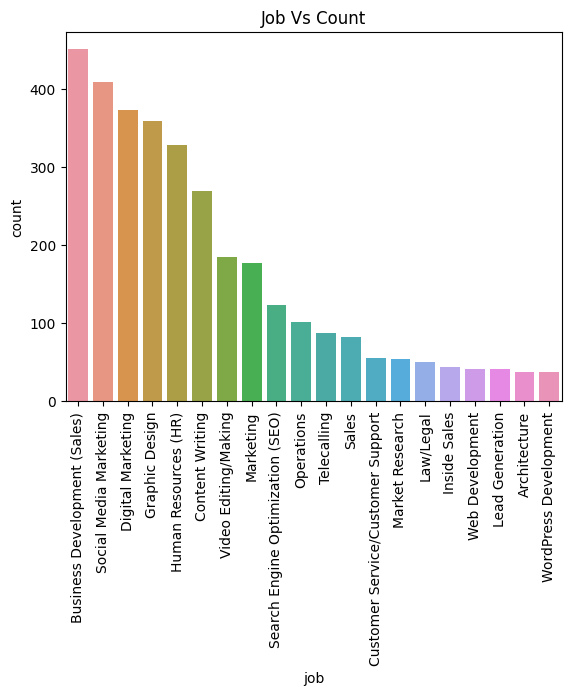

In [892]:
sns.barplot(x=jobVsCount['job'],y=jobVsCount['count'])
plt.xticks(rotation = 'vertical')
plt.title('Job Vs Count')
plt.show()

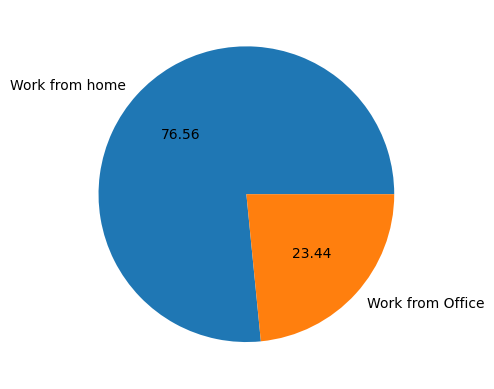

In [893]:
plt.pie(final_df['is_work_from_home'].value_counts(),labels=['Work from home','Work from Office'],autopct='%0.2f')
plt.show()

In [894]:
companyVsCount = final_df['company'].value_counts().reset_index()[:10]

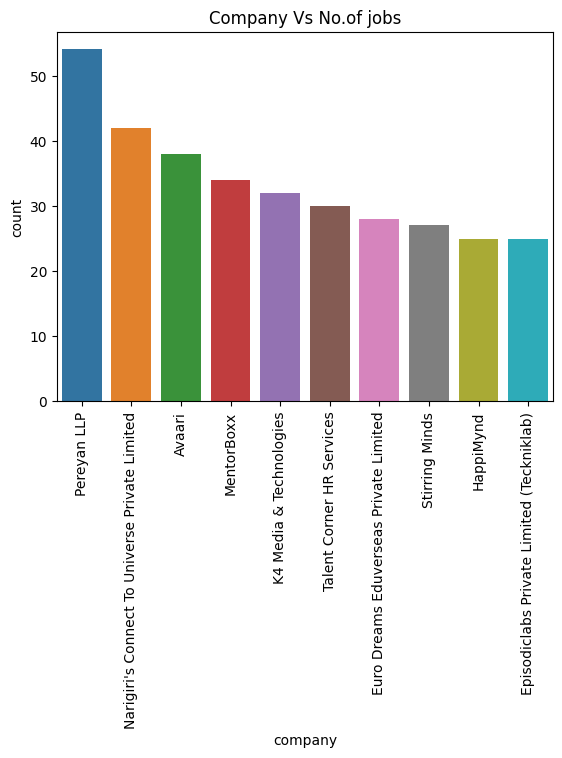

In [895]:
sns.barplot(x=companyVsCount['company'],y=companyVsCount['count'])
plt.xticks(rotation = 'vertical')
plt.title('Company Vs No.of jobs')
plt.show()

In [896]:
jobs = ['Machine Learning','Data Science','Artificial Intelligence (AI)','UI/UX Design','Python Development','Android App Development','Flutter Development','Java Development','Web Development','Full Stack Development','Cyber Security','Backend Development','Front End Development','Software Development']
final_df['comp_more_demandable_job'] = final_df['job'].apply(lambda x:1 if x in jobs else 0)

In [897]:
jobVsAvgStipend = final_df[final_df['comp_more_demandable_job']==1].groupby(['job']).mean('avg_stipend').reset_index().sort_values(by='avg_stipend',ascending=False)

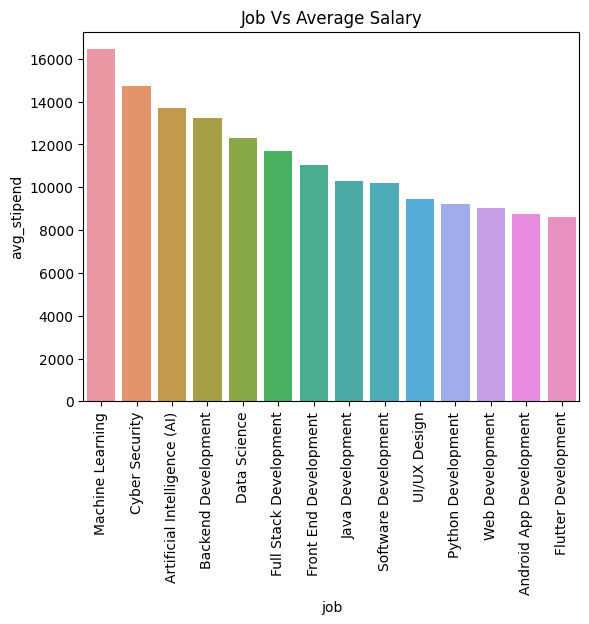

In [898]:
sns.barplot(x=jobVsAvgStipend['job'],y=jobVsAvgStipend['avg_stipend'])
plt.xticks(rotation = 'vertical')
plt.title('Job Vs Average Salary')
plt.show()

In [899]:
cVc = final_df['company'].value_counts().reset_index()
com = cVc[cVc['count']>=5]['company'].to_list()

In [900]:
final_df['com_gre_5'] = final_df['company'].apply(lambda x:1 if x in com else 0)

In [901]:
com = final_df[final_df['com_gre_5']==1].groupby(['company']).mean('avg_stipend').sort_values(by = 'avg_stipend',ascending = False)[:10]
com = com.iloc[:,0].reset_index()

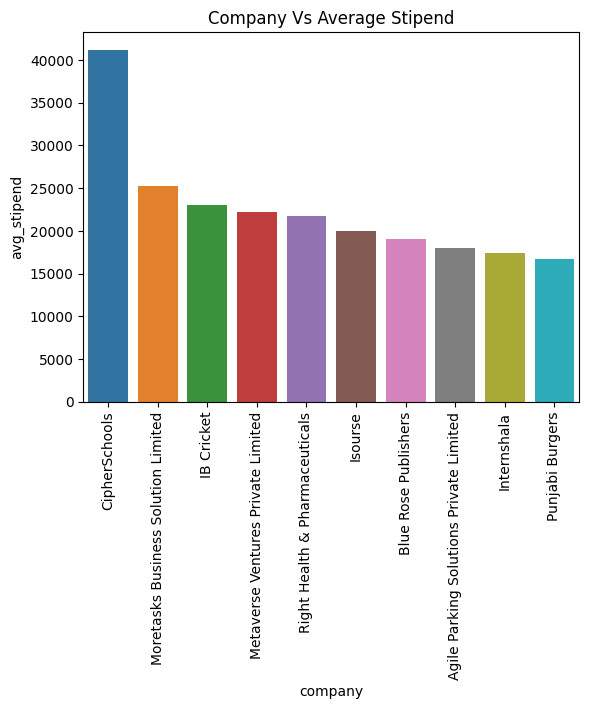

In [902]:
sns.barplot(x = com['company'],y = com['avg_stipend'])
plt.xticks(rotation='vertical')
plt.title('Company Vs Average Stipend')
plt.show()

In [903]:
backup3 = final_df

In [877]:
final_df = final_df.drop(columns = ['is_work_from_home','comp_more_demandable_job','com_gre_5'])

In [904]:
final_df['paid/free'] = final_df['avg_stipend'].apply(lambda x:0 if x==0 else 1)

In [905]:
final_df['paid/free'].value_counts()

paid/free
1    6061
0     143
Name: count, dtype: int64

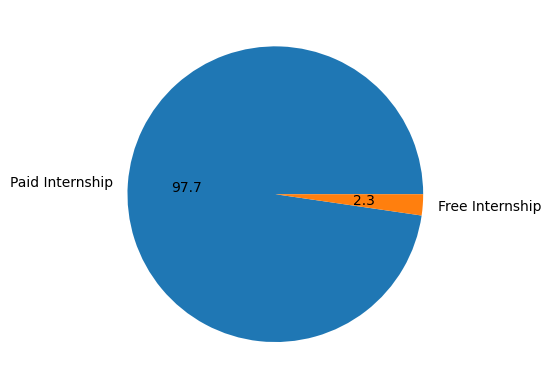

In [906]:
plt.pie(final_df['paid/free'].value_counts(),labels=['Paid Internship','Free Internship'],autopct='%0.1f')
plt.show()

In [907]:
top_10_high_paying_jobs = final_df.sort_values(by = 'avg_stipend',ascending = False)[['job','company','duration','stipend(/month)','skills_required']][:10]

In [908]:
top_10_high_paying_jobs

,job,company,duration,stipend(/month),skills_required
2617,Social Media Marketing,"Piotr Ciepiel (Barcelona, Spain)",1 Month,199608-399216,[Instagram Marketing]
649,Hotel Management (Service),Vishram International Services,6 Months,232876,"[Effective Communication, English Proficiency ..."
6092,E-Commerce Operations - Google My Business Pag...,Digipplus,3 Months,20000-250000,[NOT MENTIONED]
4345,Teaching MERN/Full-stack Development,CipherSchools,3 Months,50000-70000,"[Express.js, HTML&CSS, JavaScript, MongoDB, No..."
6002,Flutter App Development,"Brilliant Mode (San Francisco, United States)",6 Months,40000-80000,[Flutter]
3973,Teaching ReactJS,CipherSchools,2 Months,50000-60000,"[HTML&CSS, JavaScript, React, ReactJS]"
1566,Social Media Marketing,HBOX TRADING PRIVATE LIMITED,3 Months,53228,"[Audio Editing, Creative Writing, Digital Mark..."
3677,Teaching DevOps,CipherSchools,3 Months,40000-60000,"[Amazon Web Services (AWS), Ansible, DevOps, D..."
3679,Teaching React Native,CipherSchools,2 Months,40000-60000,"[JavaScript, React, React Native]"
4815,Data Structures & Algorithms Teaching,CipherSchools,3 Months,40000-60000,"[C++ Programming, Data Structures, Java]"


In [909]:
corpus = []
for i in final_df['skills_required'].to_list():
    for j in i:
        corpus.append(j.replace(' ',''))

In [910]:
from wordcloud import WordCloud
wc = WordCloud()

In [911]:
skills_cloud = wc.generate(' '.join(corpus))

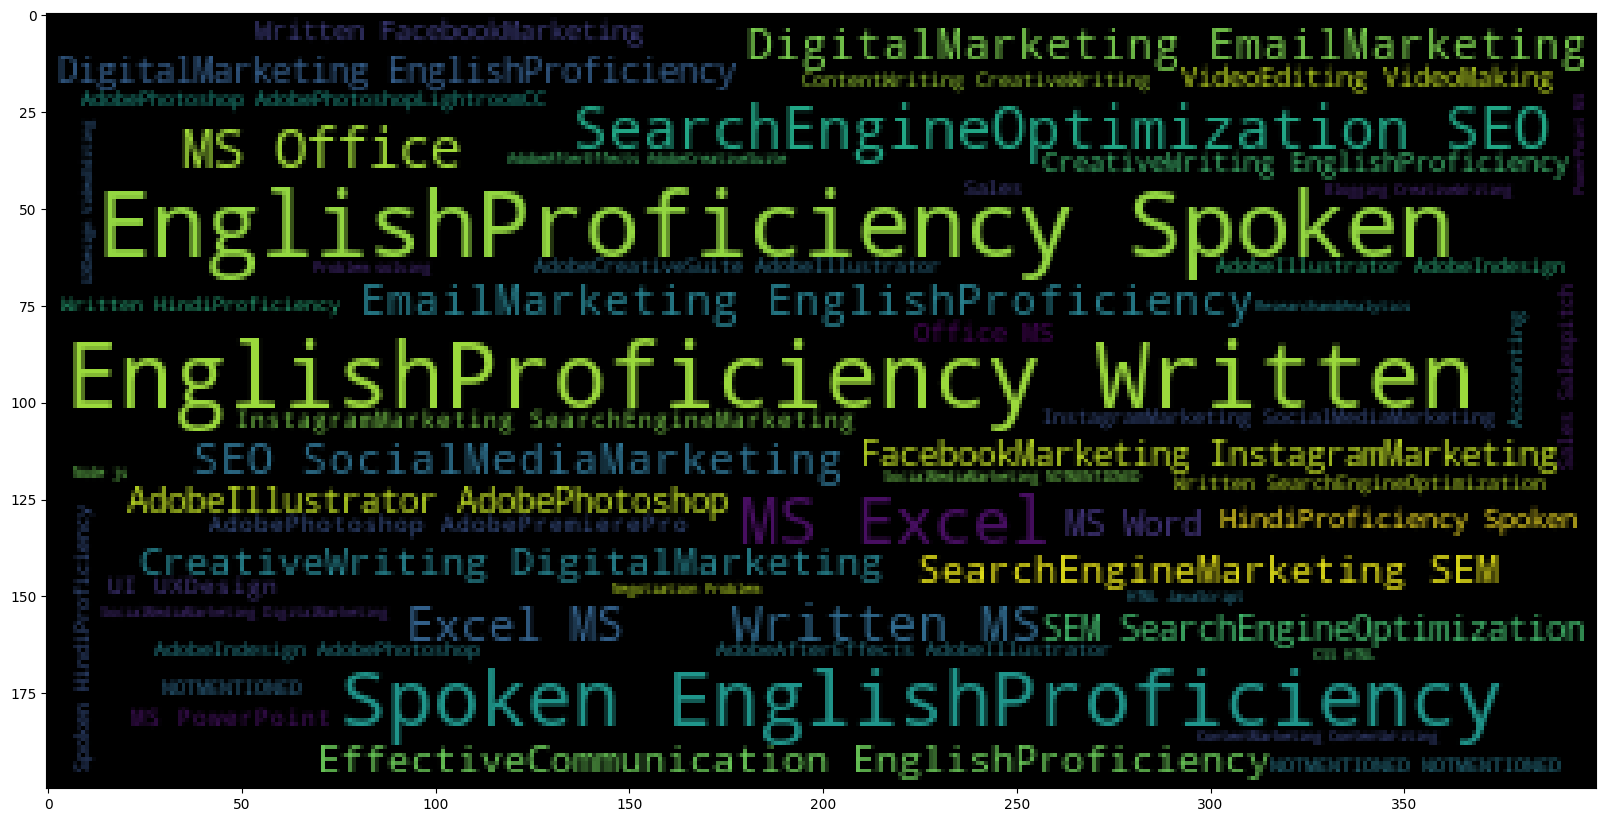

In [912]:
plt.figure(figsize=(20,20))
plt.imshow(skills_cloud)

In [913]:
from collections import Counter
high_demand_skills = pd.DataFrame(Counter(corpus).most_common(20))

In [914]:
high_demand_skills = high_demand_skills.rename(columns={0:'Skill',1:'No.of times repeated'})

In [915]:
high_demand_skills

,Skill,No.of times repeated
0,EnglishProficiency(Spoken),2013
1,EnglishProficiency(Written),1899
2,SocialMediaMarketing,1067
3,DigitalMarketing,1065
4,MS-Excel,971
5,EffectiveCommunication,724
6,CreativeWriting,700
7,SearchEngineOptimization(SEO),687
8,NOTMENTIONED,665
9,AdobePhotoshop,665


In [919]:
final_df.to_csv('final_df.csv')
jobVsCount.to_csv('jobVsCount.csv')
companyVsCount.to_csv('companyVsCount.csv')
jobVsAvgStipend.to_csv('jobVsAvgStipend.csv')
com.to_csv('com.csv')
top_10_high_paying_jobs.to_csv('top_10_high_paying_jobs.csv')
high_demand_skills.to_csv('high_demand_skills.csv')